In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

## PCA on Iris

In [30]:
# load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [31]:
X.shape, y.shape

((150, 4), (150,))

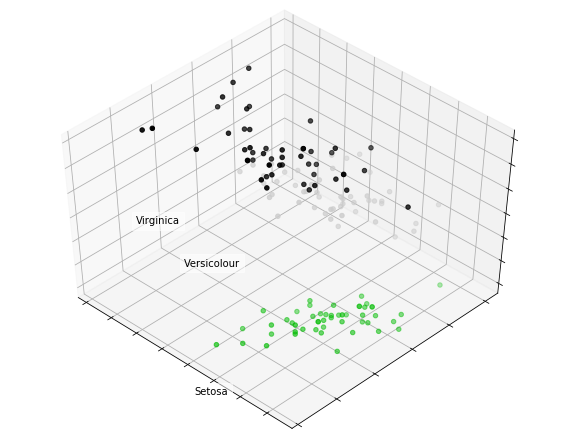

In [32]:
# visualize dataset
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Change the order of labels, so that they match
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, 
           cmap=plt.cm.nipy_spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([]);

In [33]:
# fitting classifier without reduction
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=42)

# Decision Tree with depth 2
clf = DecisionTreeClassifier(max_depth=2, 
                             random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)

print("Accuracy: ", accuracy_score(y_test, pred.argmax(axis=1)))

Accuracy:  0.8888888888888888


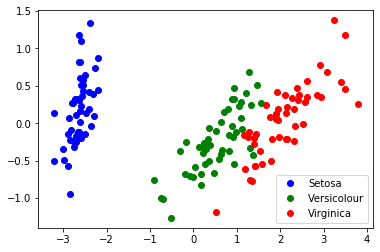

In [35]:
# applying PCA
pca = PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# plotting PCA
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);

In [37]:
# fitting model again now with PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, 
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=2, 
                             random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)
print("Accuracy: ", accuracy_score(y_test, pred.argmax(axis=1)))

Accuracy:  0.9111111111111111


In [39]:
# percent of variance explained by each component
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

## Trying on Wine dataset

In [44]:
from sklearn.preprocessing import StandardScaler

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/maykulkarni/Machine-Learning-Notebooks/master/10.%20Dimensionality%20Reduction/Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [56]:
df.shape

(178, 14)

In [57]:
X = df.iloc[:, :13].values
y = df.iloc[:, 13].values

print(X.shape, y.shape)

(178, 13) (178,)


In [58]:
# split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
# fitting Decision Trees without reduction
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
preds = tree.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, preds))

Accuracy:  0.9555555555555556


In [64]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

No handles with labels found to put in legend.


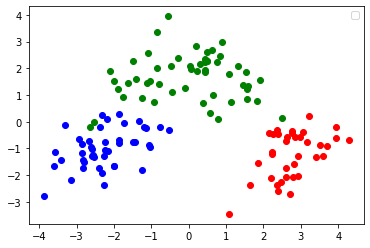

In [76]:
# applying PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# plotting PCA
plt.plot(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], 'bo')
plt.plot(X_train_pca[y_train == 2, 0], X_train_pca[y_train == 2, 1], 'go')
plt.plot(X_train_pca[y_train == 3, 0], X_train_pca[y_train == 3, 1], 'ro')
plt.legend(loc=0);

In [77]:
print(pca.explained_variance_ratio_)

[0.35749925 0.19209251 0.1084561 ]


In [78]:
# fitting Decision Trees with reduction
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_pca, y_train)
preds = tree.predict(X_test_pca)
print("Accuracy: ", accuracy_score(y_test, preds))

Accuracy:  0.9111111111111111
